# Homework
The goal of this homework is to get familiar with tools like MLflow for experiment tracking and model management.

# Setup


## Import libraries

In [37]:
import requests
import os

from IPython.display import Image, display
from mlflow.tracking import MlflowClient

## Define paths

In [31]:
# Directory of the raw data files
_data_root = './data'

# Create the dataset directory
!mkdir -p {_data_root}

PATH_RAW_DATA_JAN_2022 = f'{_data_root}/green_tripdata_2022-01.parquet'
PATH_RAW_DATA_FEB_2022 = f'{_data_root}/green_tripdata_2022-02.parquet'
PATH_RAW_DATA_MAR_2022 = f'{_data_root}/green_tripdata_2022-03.parquet'

URL_RAW_DATA_JAN_2022 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet'
URL_RAW_DATA_FEB_2022 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet'
URL_RAW_DATA_MAR_2022 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet'

TAXI_DATA_FOLDER = _data_root
MLFLOW_TRACKING_URI = 'sqlite:///mlflow.db'

## Download data

In [15]:
def download_file(url: str, save_path: str) -> None:
    """Download any type of file and save it locally.

    Args:
        url (str): URL of data file
        save_path (str): Local path to save the file
    """

    response = requests.get(url)
    with open(save_path, 'wb') as file:
        file.write(response.content)

try:
    download_file(URL_RAW_DATA_JAN_2022, PATH_RAW_DATA_JAN_2022)
    download_file(URL_RAW_DATA_FEB_2022, PATH_RAW_DATA_FEB_2022)
    download_file(URL_RAW_DATA_MAR_2022, PATH_RAW_DATA_MAR_2022)
    print(f"Data downloaded, check the folder {_data_root}")
except Exception as e:
    print(f"Error: {e}")


Data downloaded, check the folder ./data


# Q1. Install the package
To get started with MLflow you'll need to install the appropriate Python package.

For this we recommend creating a separate Python environment, for example, you can use conda environments, and then install the package there with pip or conda.

Once you installed the package, run the command `mlflow --version`  and check the output.

What's the version that you have?

In [1]:
# Checking version
!mlflow --version

mlflow, version 2.3.2


# Q2. Download and preprocess the data
We'll use the Green Taxi Trip Records dataset to predict the amount of tips for each trip.

Download the data for January, February and March 2022 in parquet format from [here](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

Use the script preprocess_data.py located in the folder homework to preprocess the data.

The script will:

* load the data from the folder <TAXI_DATA_FOLDER> (the folder where you have downloaded the data),
* fit a DictVectorizer on the training set (January 2022 data),
* save the preprocessed datasets and the DictVectorizer to disk.


Your task is to download the datasets and then execute this command:

```bash
python preprocess_data.py --raw_data_path <TAXI_DATA_FOLDER> --dest_path ./output
```

In [16]:
! python3 preprocess_data.py --raw_data_path {TAXI_DATA_FOLDER} --dest_path ./output

Tip: go to 02-experiment-tracking/homework/ folder before executing the command and change the value of <TAXI_DATA_FOLDER> to the location where you saved the data.

So what's the size of the saved DictVectorizer file?

In [21]:
def get_file_size(file_path):
    size_in_bytes = os.path.getsize(file_path)
    return size_in_bytes / 1000

# Usage
file_path = './output/dv.pkl'
file_size_in_kb = get_file_size(file_path)
print(f"File size: {file_size_in_kb} KB")

File size: 153.66 KB


# Q3. Train a model with autolog
We will train a RandomForestRegressor (from Scikit-Learn) on the taxi dataset.

We have prepared the training script `train.py` for this exercise, which can be also found in the folder homework.

The script will:

* load the datasets produced by the previous step,
* train the model on the training set,
* calculate the RMSE score on the validation set.

Your task is to modify the script to enable autologging with MLflow, execute the script and then launch the MLflow UI to check that the experiment run was properly tracked.

**Tip 1**: don't forget to wrap the training code with a `with mlflow.start_run()`: statement as we showed in the videos.

**Tip 2**: don't modify the hyperparameters of the model to make sure that the training will finish quickly.

**What is the value of the `max_depth` parameter:**

In [23]:
!python3 train.py

2023/06/01 12:25:28 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/miniconda3/envs/venv-mlflow/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


In [25]:
client = MlflowClient()
client.search_runs(experiment_ids='0')[0].data.params['max_depth']

'10'

# Launch the tracking server locally for MLflow
Now we want to manage the entire lifecycle of our ML model. In this step, you'll need to launch a tracking server. This way we will also have access to the model registry.

In case of MLflow, you need to:

* launch the tracking server on your local machine,
* select a SQLite db for the backend store and a folder called artifacts for the artifacts store.


You should keep the tracking server running to work on the next three exercises that use the server.

In [28]:
!mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts

[2023-06-01 12:45:38 -0600] [30270] [INFO] Starting gunicorn 20.1.0
[2023-06-01 12:45:38 -0600] [30270] [INFO] Listening at: http://127.0.0.1:5000 (30270)
[2023-06-01 12:45:38 -0600] [30270] [INFO] Using worker: sync
[2023-06-01 12:45:38 -0600] [30272] [INFO] Booting worker with pid: 30272
[2023-06-01 12:45:38 -0600] [30273] [INFO] Booting worker with pid: 30273
[2023-06-01 12:45:38 -0600] [30274] [INFO] Booting worker with pid: 30274
[2023-06-01 12:45:38 -0600] [30275] [INFO] Booting worker with pid: 30275
^C
[2023-06-01 12:45:43 -0600] [30270] [INFO] Handling signal: int
[2023-06-01 12:45:43 -0600] [30275] [INFO] Worker exiting (pid: 30275)
[2023-06-01 12:45:43 -0600] [30273] [INFO] Worker exiting (pid: 30273)
[2023-06-01 12:45:43 -0600] [30274] [INFO] Worker exiting (pid: 30274)
[2023-06-01 12:45:43 -0600] [30272] [INFO] Worker exiting (pid: 30272)


**Note**: This code was executed on a terminal. It is not possible to run the code in the background from a notebook.

# Q4. Tune model hyperparameters
Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using `optuna`. We have prepared the script `hpo.py` for this exercise.

Your task is to modify the script `hpo.py` and make sure that the validation RMSE is logged to the tracking server for each run of the hyperparameter optimization (you will need to add a few lines of code to the `objective` function) and run the script without passing any parameters.

After that, open UI and explore the runs from the experiment called `random-forest-hyperopt` to answer the question below.

Note: Don't use autologging for this exercise.

The idea is to just log the information that you need to answer the question below, including:

* the list of hyperparameters that are passed to the objective function during the optimization,
* the RMSE obtained on the validation set (February 2022 data).


**What's the best validation RMSE that you got?**

In [30]:
!python hpo.py

2023/06/01 12:55:34 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-hyperopt' does not exist. Creating a new experiment.
[I 2023-06-01 12:55:34,533] A new study created in memory with name: no-name-8ebc8b95-5b1b-4dbc-94c7-beba3b5a1c48
[I 2023-06-01 12:55:36,395] Trial 0 finished with value: 2.451379690825458 and parameters: {'n_estimators': 25, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 2.451379690825458.
[I 2023-06-01 12:55:36,609] Trial 1 finished with value: 2.4667366020368333 and parameters: {'n_estimators': 16, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 2.451379690825458.
[I 2023-06-01 12:55:37,712] Trial 2 finished with value: 2.449827329704216 and parameters: {'n_estimators': 34, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 2 with value: 2.449827329704216.
[I 2023-06-01 12:55:38,170] Trial 3 finished with value: 2.460983516558473 a

In [32]:
client = MlflowClient(MLFLOW_TRACKING_URI)

In [33]:
runs = client.search_runs(experiment_ids=1,
                         max_results=10,
                         order_by=['metrics.rmse ASC'])

for run in runs:
    print(f"run info name: {run.info.run_name}, metrics score of rmse: {run.data.metrics['rmse']}")

run info name: bedecked-ape-906, metrics score of rmse: 2.449827329704216
run info name: resilient-asp-134, metrics score of rmse: 2.451379690825458
run info name: secretive-jay-853, metrics score of rmse: 2.4516421799356767
run info name: funny-bird-1, metrics score of rmse: 2.453877262701052
run info name: trusting-auk-619, metrics score of rmse: 2.455971238567075
run info name: skittish-dove-514, metrics score of rmse: 2.460983516558473
run info name: carefree-grouse-25, metrics score of rmse: 2.4667366020368333
run info name: respected-flea-764, metrics score of rmse: 2.4720122094960733
run info name: languid-bug-46, metrics score of rmse: 2.486106021576535
run info name: rogue-deer-476, metrics score of rmse: 2.5374040268274087


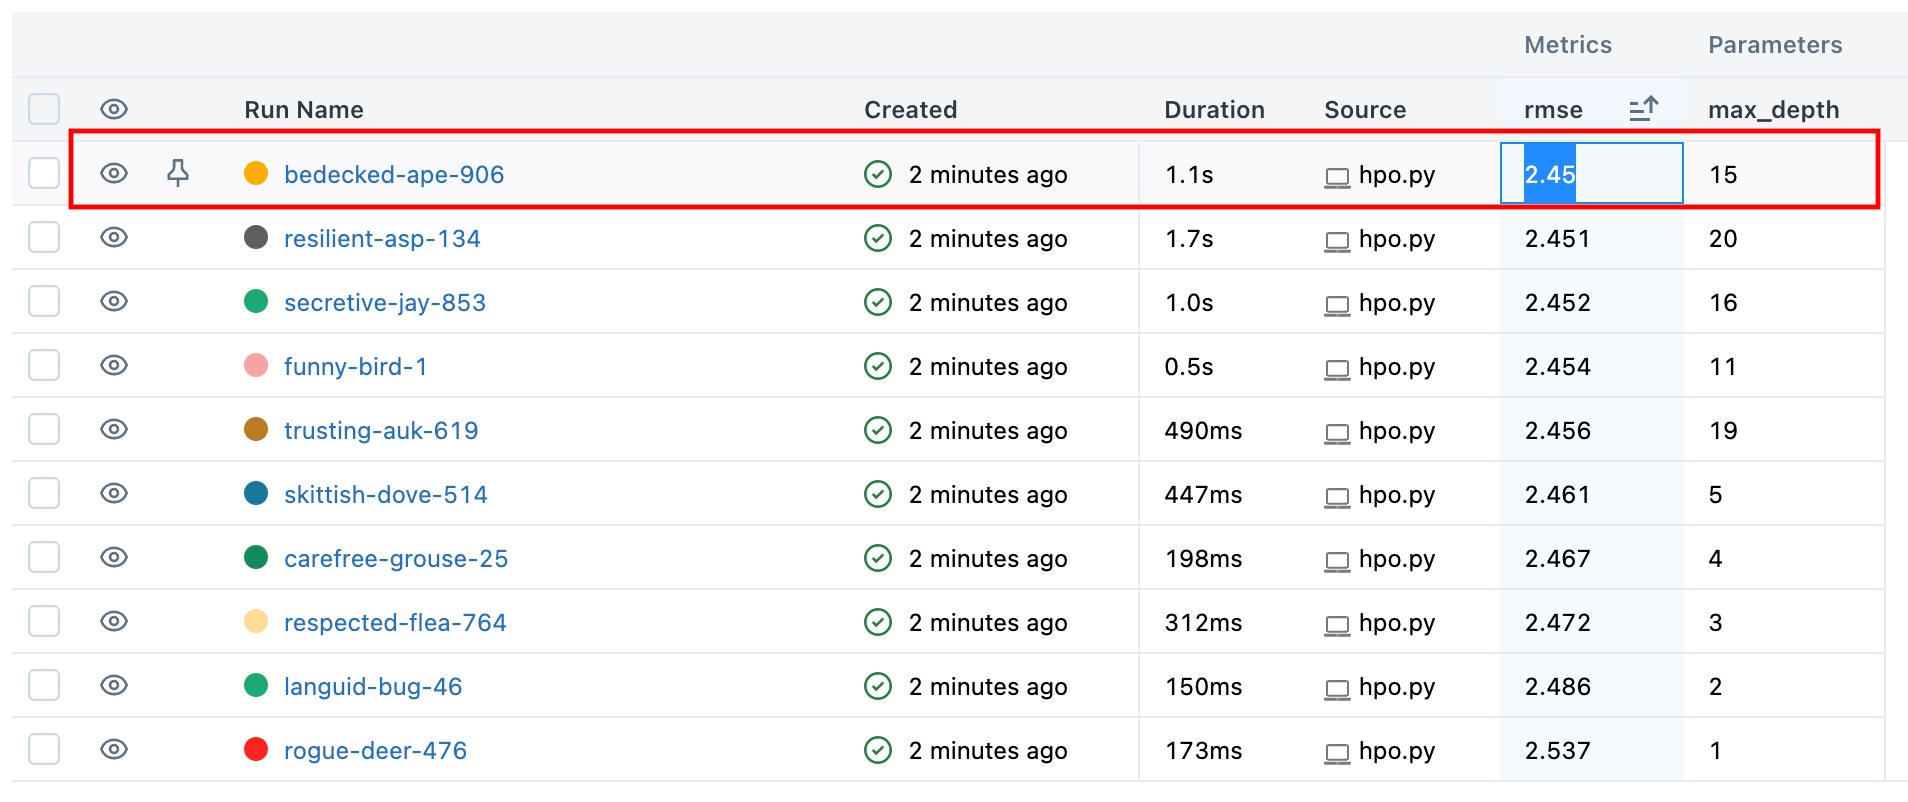

In [36]:
display(Image(filename='./mlflow-q4.jpg'))


# Q5. Promote the best model to the model registry
The results from the hyperparameter optimization are quite good. So, we can assume that we are ready to test some of these models in production. In this exercise, you'll promote the best model to the model registry. We have prepared a script called `register_model.py`, which will check the results from the previous step and select the top 5 runs. After that, it will calculate the RMSE of those models on the test set (March 2022 data) and save the results to a new experiment called `random-forest-best-models`.

Your task is to update the script `register_model.py` so that it selects the model with the lowest RMSE on the test set and registers it to the model registry.

Tips for MLflow:

* you can use the method `search_runs` from the `MlflowClient` to get the model with the lowest RMSE, 
* to register the model you can use the method `mlflow.register_model` and you will need to pass the right `model_uri` in the form of a string that looks like this: "`runs:/<RUN_ID>/model`", and the name of the model (make sure to choose a good one!).

**What is the test RMSE of the best model?**

In [38]:
!python register_model.py

2023/06/01 13:30:20 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-best-models' does not exist. Creating a new experiment.
2023/06/01 13:30:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/miniconda3/envs/venv-mlflow/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."
Successfully registered model 'RFR_Best_Model'.
2023/06/01 13:30:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: RFR_Best_Model, version 1
Created version '1' of model 'RFR_Best_Model'.


In [39]:
reg_models = client.search_registered_models()
reg_models

[<RegisteredModel: aliases={}, creation_timestamp=1685647838941, description='', last_updated_timestamp=1685647838980, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1685647838980, current_stage='None', description='', last_updated_timestamp=1685647838980, name='RFR_Best_Model', run_id='4161fdd2f4eb409782c364201582befb', run_link='', source='/Users/deltasmith/mlops-zoomcamp/02-experiment-tracking/artifacts/2/4161fdd2f4eb409782c364201582befb/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>], name='RFR_Best_Model', tags={}>]

In [40]:
latest_version = client.get_latest_versions(name=reg_models[0].name)[0]
run_id = latest_version.run_id
run_id

'4161fdd2f4eb409782c364201582befb'

In [41]:
best_run = client.get_run(run_id=run_id)
best_run.data.metrics['test_rmse']

2.2854691906481364

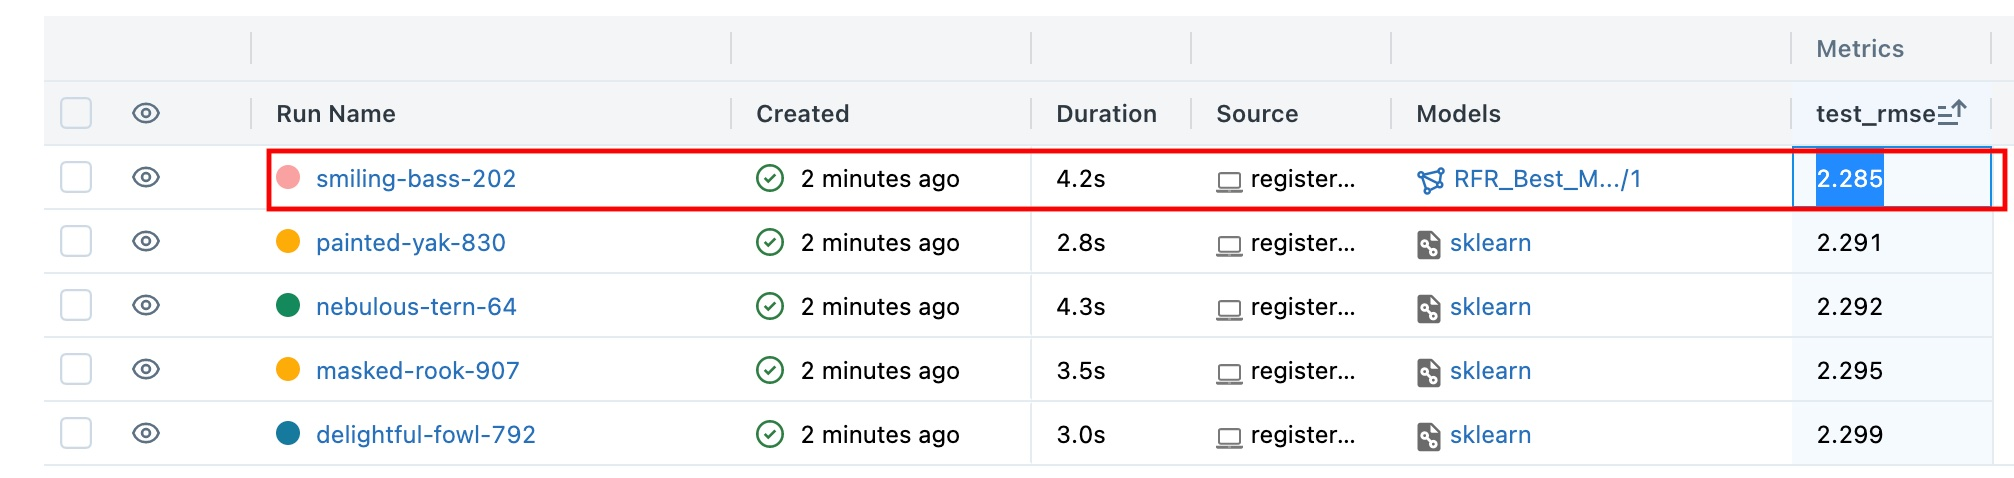

In [43]:
display(Image(filename='./mlflow-q5.jpg'))